<a href="https://colab.research.google.com/github/SURYAKNIGHT17/DATA_SCIENTIST/blob/main/test_mini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Choose the file upload option:
1. Upload from local computer
2. Upload from Google Drive
Enter 1 or 2: 1
Upload your dataset from local computer.


Saving Marvel Vs DC NEW.csv to Marvel Vs DC NEW.csv

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1690 non-null   int64  
 1   Movie        1690 non-null   object 
 2   Year         1657 non-null   object 
 3   Genre        1683 non-null   object 
 4   RunTime      1690 non-null   object 
 5   Description  1690 non-null   object 
 6   IMDB_Score   1690 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 92.5+ KB
None

First 5 rows of the dataset:
   ID                              Movie      Year                     Genre  \
0   0                           Eternals     -2021    Action,Adventure,Drama   
1   1                               Loki  (2021– )  Action,Adventure,Fantasy   
2   2  The Falcon and the Winter Soldier     -2021    Action,Adventure,Drama   
3   3                        Wand

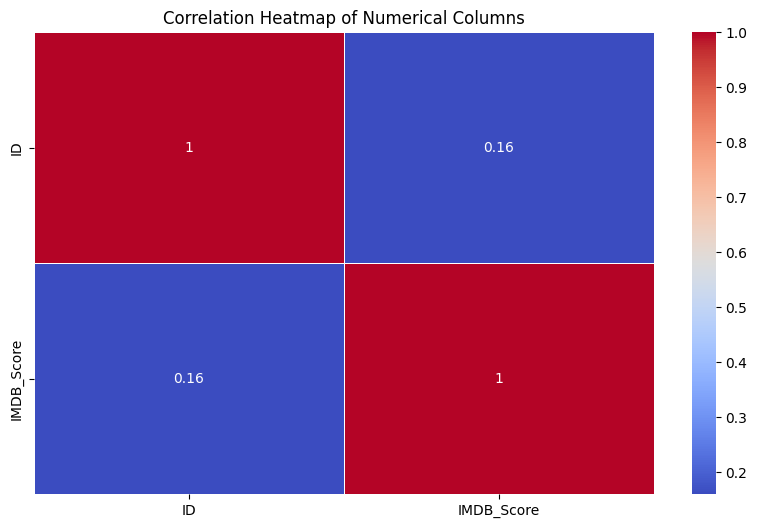


**Explanation of Correlation Heatmap:**
This heatmap shows the relationships between numerical columns in the dataset. Darker colors indicate stronger correlations.


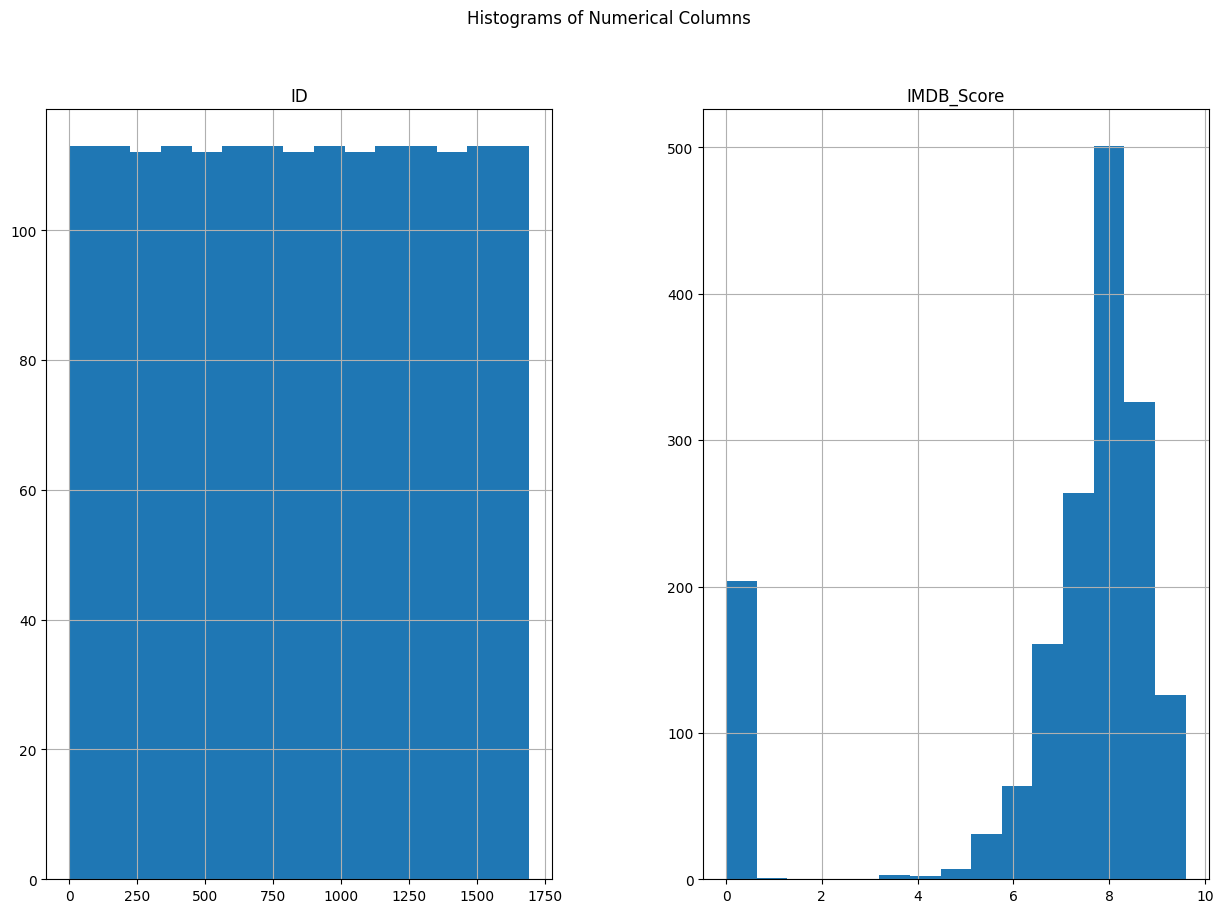


**Explanation of Histograms:**
These histograms show the distribution of values for each numerical column. They help identify the spread, skewness, and concentration of the data.


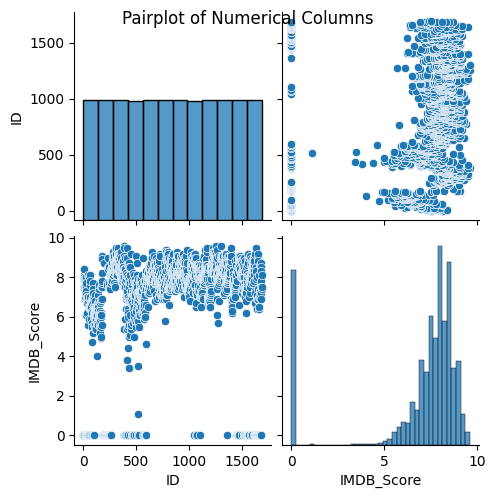


**Explanation of Pairplot:**
This pairplot shows scatter plots between pairs of numerical columns, indicating trends or patterns.

Text Columns: ['Movie', 'Year', 'Genre', 'RunTime', 'Description']


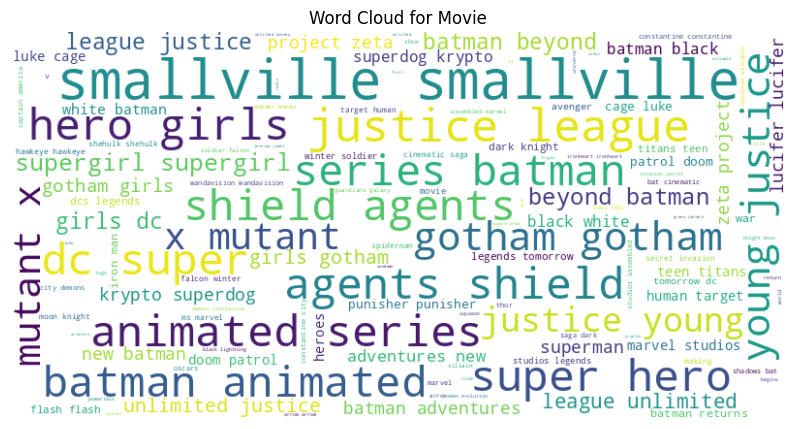


**Explanation of Word Cloud for Movie:**
This word cloud shows the most frequent words in the 'Movie' column. Larger words appear more frequently in the text.


TypeError: sequence item 44: expected str instance, float found

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from google.colab import files, drive
import io
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk

# Download NLTK resources for text analysis
nltk.download('punkt')
nltk.download('stopwords')

# Prompt user for file upload option
print("Choose the file upload option:")
print("1. Upload from local computer")
print("2. Upload from Google Drive")

# Take user input for the choice
choice = input("Enter 1 or 2: ")

# Load dataset based on user choice
if choice == '1':
    print("Upload your dataset from local computer.")
    uploaded = files.upload()  # Local computer upload
    for filename in uploaded.keys():
        df = pd.read_csv(io.BytesIO(uploaded[filename]))

elif choice == '2':
    print("Upload your dataset from Google Drive.")
    drive.mount('/content/drive')  # Mount Google Drive
    file_path = input("Enter the full path of the file on Google Drive (e.g., /content/drive/My Drive/your_file.csv): ")
    df = pd.read_csv(file_path)  # Load dataset from the specified file path

else:
    print("Invalid option selected! Please restart and choose either 1 or 2.")
    exit()

# Display basic information
print("\nBasic Info:")
print(df.info())

print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nDataset shape:")
print(df.shape)

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Identify data types
numerical_cols = df.select_dtypes(include=np.number).columns
text_cols = df.select_dtypes(include=['object']).columns

# Inform the user about the type of dataset
if not numerical_cols.empty and not text_cols.empty:
    print("\nThe dataset contains both numerical and text data.")
elif not numerical_cols.empty:
    print("\nThe dataset contains only numerical data.")
elif not text_cols.empty:
    print("\nThe dataset contains only text data.")
else:
    print("\nThe dataset does not contain any recognizable numerical or text data.")

# Function to clean text data
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Tokenize and clean text for word cloud or word frequency
def process_text_for_visualization(text_column):
    stop_words = set(stopwords.words('english'))
    cleaned_text = text_column.str.lower().str.replace(r'\d+', '', regex=True).str.replace(r'[^\w\s]', '', regex=True)
    all_words = ' '.join(cleaned_text).split()
    filtered_words = [word for word in all_words if word not in stop_words]
    return filtered_words

# Visualization based on data types present
if not numerical_cols.empty and not text_cols.empty:
    # 1. Numerical visualizations
    print(f"\nNumerical Columns: {list(numerical_cols)}")

    # Correlation heatmap for numerical data
    plt.figure(figsize=(10,6))
    sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap of Numerical Columns')
    plt.show()
    print("\n**Explanation of Correlation Heatmap:**")
    print("This heatmap shows the relationships between numerical columns in the dataset. Darker colors indicate stronger correlations.")

    # Histograms for numerical columns
    df[numerical_cols].hist(figsize=(15, 10), bins=15)
    plt.suptitle('Histograms of Numerical Columns')
    plt.show()
    print("\n**Explanation of Histograms:**")
    print("These histograms show the distribution of values for each numerical column. They help identify the spread, skewness, and concentration of the data.")

    # Pairplot for numerical columns (if less than 10 numerical columns)
    if len(numerical_cols) <= 10:
        sns.pairplot(df[numerical_cols])
        plt.suptitle('Pairplot of Numerical Columns')
        plt.show()
        print("\n**Explanation of Pairplot:**")
        print("This pairplot shows scatter plots between pairs of numerical columns, indicating trends or patterns.")

    # Text visualizations
    print(f"\nText Columns: {list(text_cols)}")

    # Word Cloud for each text column
    for col in text_cols:
        words = process_text_for_visualization(df[col])
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))

        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {col}')
        plt.show()
        print(f"\n**Explanation of Word Cloud for {col}:**")
        print(f"This word cloud shows the most frequent words in the '{col}' column. Larger words appear more frequently in the text.")

elif not numerical_cols.empty:
    # 1. Numerical visualizations
    print(f"\nNumerical Columns: {list(numerical_cols)}")

    # Correlation heatmap for numerical data
    plt.figure(figsize=(10,6))
    sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap of Numerical Columns')
    plt.show()
    print("\n**Explanation of Correlation Heatmap:**")
    print("This heatmap shows the relationships between numerical columns in the dataset. Darker colors indicate stronger correlations.")

    # Histograms for numerical columns
    df[numerical_cols].hist(figsize=(15, 10), bins=15)
    plt.suptitle('Histograms of Numerical Columns')
    plt.show()
    print("\n**Explanation of Histograms:**")
    print("These histograms show the distribution of values for each numerical column. They help identify the spread, skewness, and concentration of the data.")

    # Pairplot for numerical columns (if less than 10 numerical columns)
    if len(numerical_cols) <= 10:
        sns.pairplot(df[numerical_cols])
        plt.suptitle('Pairplot of Numerical Columns')
        plt.show()
        print("\n**Explanation of Pairplot:**")
        print("This pairplot shows scatter plots between pairs of numerical columns, indicating trends or patterns.")

elif not text_cols.empty:
    # Text visualizations
    print(f"\nText Columns: {list(text_cols)}")

    # Word Cloud for each text column
    for col in text_cols:
        words = process_text_for_visualization(df[col])
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))

        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {col}')
        plt.show()
        print(f"\n**Explanation of Word Cloud for {col}:**")
        print(f"This word cloud shows the most frequent words in the '{col}' column. Larger words appear more frequently in the text.")

else:
    print("The dataset does not contain any recognizable numerical or text data for visualization.")

# Final message
print("\nAnalysis and visualizations are complete!")
